<a href="https://colab.research.google.com/github/nicholascfp/Mentoring-II-Projeto-CEPOC-Linguagens/blob/main/Notebooks/Tarefa_3_6_N%C3%ADcholas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Tarefa 3.6 - Projeto 1 - Análise exploratória de dados*

##Essa tarefa tem como objetivo principal realizar uma análise exploratória do conjunto de dados abaixo:

* [venda_vídeo_games](https://github.com/malegopc/DSBD/tree/main/Datasets/Video_games)

### O conjunto de dados contém uma lista de videogames com vendas superiores a 100.000 cópias entre os anos de 1986 e 2016. Foi gerado por meio de web scraping pelo [vgchartz.com](https://www.vgchartz.com/) e apresenta as seguintes variáveis:

Nome -  Nome dos jogos

Plataforma - Plataforma do lançamento dos jogos (ou seja, PC, PS4, etc.)

Ano - Ano de lançamento do jogo

Gênero - Gênero do jogo

Produtor - Editora/produtora do jogo

NA - Vendas na América do Norte (em milhões)

EU - Vendas na Europa (em milhões)

JP - Vendas no Japão (em milhões)

RM - Vendas no resto do mundo (em milhões)

Global - Total de vendas mundiais

Você deverá construir um notebook em Python atendendo os seguintes requisitos:

I.   Empregar ao máximo métodos de visualização gráfica estudados na "Unidade 3 - Análise Exploratória e Estatística Descritiva" e outros que julgar pertinente;

II.   Apresentar minimamente as seguintes análises ou informações:

1.   Top 5 dos jogos mais vendidos (considerando todos os anos); (sugestão: df[' '].value_counts())
2.   Mostrar a distribuição de frequências (contagem) de todos os gêneros de jogos. Você deve apresentar uma listagem em ordem decrescente (dos gêneros de jogos mais lançados até os menos lançados). Apresente também um gráfico de barras (ou histograma) da distribuição (contagem) dos gêneros em ordem decrescente; (sugestão: df[' '].value_counts()  e sns.countplot(...))
3. Número de jogos lançados por ano (mostrar listagem numérica e gráfico);
4. Volume de vendas globais por ano (mostrar listagem numérica e gráfico); (sugestão: df.groupby(by=['Ano'])['Global'].sum()
5. Volume de vendas globais por gênero (mostrar listagem numérica e gráfico);
6. Mostrar a distribuição de frequências (contagem) de todas as plataformas de jogos. Da mesma forma que o item 2 (listagem e gráfico de barras).
7. Volume de vendas globais por plataforma (mostrar listagem numérica e gráfico);
8. Top 10 das produtoras (pelo número de jogos);
9. Mostrar a proporção de venda de cada região (NA, EU, JP, RM) no total da venda global (mostrar por meio de um pie chart);
10. Correlação de vendas entre NA, EU, JP, RM e Global (mostrar matriz de correlação e mapa de calor);
11. Comparar o volume de vendas por ano das plataformas Xbox One e PS4 (mostre por meio de um gráfico de barras); (sugestão: 
sns.barplot(x = 'Ano',y = 'Global', hue = 'Plataforma'...)
12. Mostrar por meio de boxplots o grau de dispersão em cada ano das vendas globais das plataformas Xbox One e PS4 (mostrar num mesmo plot); (sugestão: sns.boxplot(x='Plataforma', y='Global', hue = 'Ano'...)

III. Apresentar outras análises.


## *I.   Empregar ao máximo métodos de visualização gráfica estudados na "Unidade 3 - Análise Exploratória e Estatística Descritiva" e outros que julgar pertinente;*



In [40]:
!git clone "https://github.com/malegopc/DSBD"

# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import pandas as pd
import math as math
import statistics as stats
import plotly.express as px
import plotly.graph_objects as go

# Read Data Files
df = pd.read_excel('/content/DSBD/Datasets/Video_games/venda_video_games.xlsx')
# Eliminate null lines
#df = df.dropna()
# Show Data
df

fatal: destination path 'DSBD' already exists and is not an empty directory.


,Nome,Plataforma,Ano,Gênero,Produtor,NA,EU,JP,RM,Global
0,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
2,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
3,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
4,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
...,...,...,...,...,...,...,...,...,...,...
16292,Mighty No. 9,XOne,2016,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
16293,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
16294,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16295,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01


In [2]:
# Dataset Length
print('Dataset Length:')
n = len(df)
print(n)
# Show non-null Data Numbers
print('\nData Info:\n')
df.info()
# Null Data Numbers Sum
print('\nNull Data Numbers Sum:\n')
df.isnull().sum()

Dataset Length:
16297

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16297 entries, 0 to 16296
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nome        16297 non-null  object 
 1   Plataforma  16297 non-null  object 
 2   Ano         16297 non-null  int64  
 3   Gênero      16297 non-null  object 
 4   Produtor    16261 non-null  object 
 5   NA          16297 non-null  float64
 6   EU          16297 non-null  float64
 7   JP          16297 non-null  float64
 8   RM          16297 non-null  float64
 9   Global      16297 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB

Null Data Numbers Sum:



Nome           0
Plataforma     0
Ano            0
Gênero         0
Produtor      36
NA             0
EU             0
JP             0
RM             0
Global         0
dtype: int64

II.   Apresentar minimamente as seguintes análises ou informações:

1.   Top 5 dos jogos mais vendidos (considerando todos os anos); (sugestão: df[' '].value_counts())

In [38]:
# Somatório de vendas de Grand Theft Auto V em outras plataformas fazem com que entre no Top 2
top_5 = df.groupby(by = ['Nome'])['Global'].sum().sort_values(ascending = False)
top_5.head(5)

Nome
Wii Sports            82.74
Grand Theft Auto V    55.92
Super Mario Bros.     45.31
Tetris                35.84
Mario Kart Wii        35.82
Name: Global, dtype: float64

2.   Mostrar a distribuição de frequências (contagem) de todos os gêneros de jogos. Você deve apresentar uma listagem em ordem decrescente (dos gêneros de jogos mais lançados até os menos lançados). Apresente também um gráfico de barras (ou histograma) da distribuição (contagem) dos gêneros em ordem decrescente; (sugestão: df[' '].value_counts()  e sns.countplot(...))

In [54]:
gender = df.value_counts(subset= ['Gênero'], ascending = False)
print(gender)
fig = px.histogram(df['Gênero'], x = 'Gênero', color = 'Gênero', title = 'Games Genre').update_xaxes(categoryorder='total descending')
fig.show()

Gênero      
Action          3249
Sports          2304
Misc            1710
Role-Playing    1469
Shooter         1282
Adventure       1253
Racing          1226
Platform         876
Simulation       850
Fighting         836
Strategy         671
Puzzle           571
dtype: int64


3. Número de jogos lançados por ano (mostrar listagem numérica e gráfico);

In [56]:
releases_year = df.value_counts(subset= ['Ano'], sort = False)
print(releases_year)
fig = px.histogram(df['Ano'], x = "Ano", color = 'Ano', title = 'Releases per Year')
fig.show()

Ano 
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     349
2001     482
2002     829
2003     775
2004     763
2005     941
2006    1008
2007    1201
2008    1428
2009    1429
2010    1257
2011    1136
2012     652
2013     543
2014     578
2015     608
2016     344
dtype: int64


4. Volume de vendas globais por ano (mostrar listagem numérica e gráfico); (sugestão: df.groupby(by=['Ano'])['Global'].sum()

In [59]:
volume_year = df.groupby(by = ['Ano'], as_index = False)['Global'].sum()
df['Volume']



KeyError: ignored

5. Volume de vendas globais por gênero (mostrar listagem numérica e gráfico);


          Gênero   Global
0         Action  1722.60
1      Adventure   233.58
2       Fighting   444.05
3           Misc   797.62
4       Platform   829.15
5         Puzzle   242.22
6         Racing   726.77
7   Role-Playing   923.80
8        Shooter  1026.20
9     Simulation   389.87
10        Sports  1309.24
11      Strategy   173.43


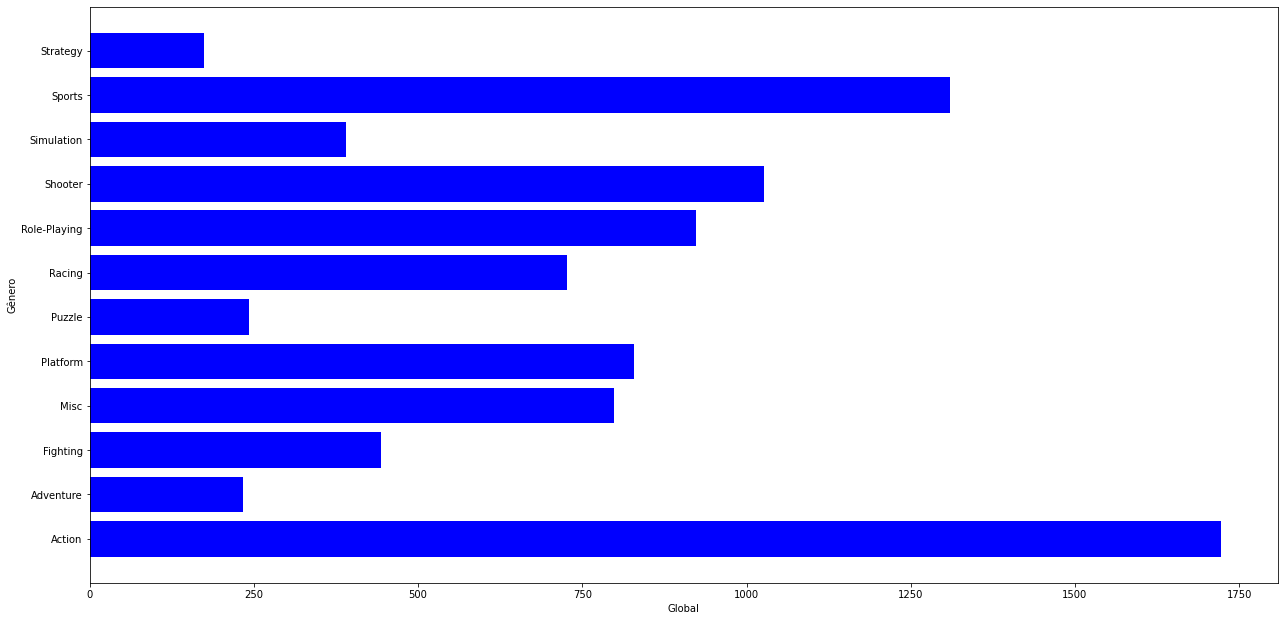

In [ ]:
volume_gender = df.groupby(by = ['Gênero'], as_index = False)['Global'].sum()
print(volume_gender)

plt.barh(volume_gender['Gênero'], volume_gender['Global'], color='blue')
plt.subplots_adjust(left   = 1.50,
                    bottom = 3.00, 
                    right  = 4.25, 
                    top    = 5.00, 
                    wspace = 0.25, 
                    hspace = 2.00)

plt.xlabel('Global')
plt.ylabel('Gênero')
plt.show()

6. Mostrar a distribuição de frequências (contagem) de todas as plataformas de jogos. Da mesma forma que o item 2 (listagem e gráfico de barras).


In [82]:
platform = df.value_counts(subset= ['Plataforma'], ascending = False)
print(platform)
fig = px.histogram(df['Plataforma'], x = 'Plataforma', title = 'Games Platforms').update_xaxes(categoryorder='total descending')
#fig = px.histogram(df['Gênero'], x = 'Gênero', color = 'Gênero', title = 'Games Genre').update_xaxes(categoryorder='total descending')
fig.show()

Plataforma
DS            2132
PS2           2126
PS3           1298
Wii           1290
X360          1229
PSP           1193
PS            1189
PC             943
GBA            811
XB             803
GC             542
3DS            500
PSV            403
PS4            333
N64            316
SNES           239
XOne           213
SAT            173
WiiU           143
2600           116
NES             98
GB              97
DC              52
GEN             27
NG              12
SCD              6
WS               6
3DO              3
TG16             2
PCFX             1
GG               1
dtype: int64


7. Volume de vendas globais por plataforma (mostrar listagem numérica e gráfico;


   Plataforma   Global
0        2600    86.57
1         3DO     0.10
2         3DS   246.28
3          DC    15.97
4          DS   818.67
5          GB   254.42
6         GBA   313.56
7          GC   197.14
8         GEN    28.36
9          GG     0.04
10        N64   218.21
11        NES   251.07
12         NG     1.44
13         PC   255.05
14       PCFX     0.03
15         PS   727.39
16        PS2  1233.45
17        PS3   949.04
18        PS4   278.01
19        PSP   291.40
20        PSV    61.06
21        SAT    33.59
22        SCD     1.87
23       SNES   200.05
24       TG16     0.16
25         WS     1.42
26        Wii   909.81
27       WiiU    81.86
28       X360   969.36
29         XB   252.09
30       XOne   141.06


TypeError: ignored

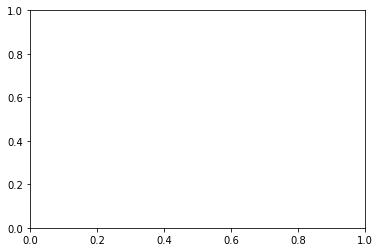

In [ ]:
#II.7
volume_plat = df.groupby(by = ['Plataforma'], as_index = False)['Global'].sum()
print(volume_plat)

plt.barh(volume_plat['Plataforma'], volume_plat['Global'], color='red')
plt.subplots_adjust(left   = 1.50,
                    bottom = 3.00, 
                    right  = 4.25, 
                    top    = 5.00, 
                    wspace = 0.25, 
                    hspace = 2.00)

plt.xlabel('Global')
plt.ylabel('Plataforma')
plt.show()

8. Top 10 das produtoras (pelo número de jogos);

In [ ]:
producers = df.value_counts(subset= ['Produtor'], ascending = False)
print(producers)

top_10_producers = df.sort_values(by = producers)
top_10_producers

#top_10_producers = df.sort_values(by = ['Produtor'], ascending = False)
top_10_producers.head(10)

Produtor                    
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          917
Konami Digital Entertainment     823
                                ... 
Ertain                             1
Epic Games                         1
Seventh Chord                      1
Enjoy Gaming ltd.                  1
MLB.com                            1
Length: 576, dtype: int64


KeyError: ignored

9. Mostrar a proporção de venda de cada região (NA, EU, JP, RM) no total da venda global (mostrar por meio de um pie chart);


10. Correlação de vendas entre NA, EU, JP, RM e Global (mostrar matriz de correlação e mapa de calor);

11. Comparar o volume de vendas por ano das plataformas Xbox One e PS4 (mostre por meio de um gráfico de barras); (sugestão: 
sns.barplot(x = 'Ano',y = 'Global', hue = 'Plataforma'...);

12. Mostrar por meio de boxplots o grau de dispersão em cada ano das vendas globais das plataformas Xbox One e PS4 (mostrar num mesmo plot); (sugestão: sns.boxplot(x='Plataforma', y='Global', hue = 'Ano'...);